In [11]:
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
import sys
import os
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.collections import PathCollection

from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

from scipy.optimize import curve_fit

import math

module_name = "utils_v2"
file_path = "/workspaces/TP3/utils_v2.py"

spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = module
spec.loader.exec_module(module)

# Importer le module
import utils_v2 as u

import pandas as pd

## Import datas

In [15]:
#import datas
Gases = ['AIR', 'HE', 'N','AR']

d0 = np.array([5,5.5,4.5,6.6])
p0 = np.array([4.9e-2,2.3e-1,6.4e-2,4.6e-2])

ps = [[] for i in range(len(Gases))]
ds = [[] for i in range(len(Gases))]
ps_error = [[] for i in range(len(Gases))]
ds_error = [[] for i in range(len(Gases))]
d_error = 0.2
p0_error = [0.1e-2,0.1e-2,0.1e-2,0.1e-2]

for g,gas in enumerate(Gases):
    data = pd.read_csv(f'/workspaces/TP3/TP_Plasma/Datas/d_{gas}.csv', sep=';', decimal='.', header=1, usecols=[0, 1])
    
    p = data.iloc[:, 0].values
    d = data.iloc[:, 1].values
    
    p_error = np.zeros(len(p))
    for i in range(len(p)):
        exposant = int(math.floor(math.log10(abs(p[i]))))
        p_error[i] = 0.1*10**(exposant)
    ps[g] = p0[g]/p
    ds[g] = d/d0[g]
    ps_error[g] = 1/p * p0_error[g] + p0[g] / p**2 * p_error

    ds_error[g] = 1/d0[g] * d_error + d / d0[g]**2 * d_error

    
print(ps[0])
print(ds[0])
print(ps_error[0])
print(ds_error[0])





[1.         0.84482759 0.77777778 0.72058824 0.7        0.67123288
 0.63636364 0.59036145 0.5505618  0.49       0.44545455 0.35
 0.27222222 0.245      0.18148148 0.153125   0.10425532]
[1.   0.94 0.9  0.86 0.84 0.8  0.78 0.74 0.72 0.68 0.66 0.62 0.56 0.54
 0.5  0.46 0.4 ]
[0.04081633 0.03180737 0.02821869 0.02530277 0.02428571 0.0228936
 0.02125148 0.01916098 0.01742204 0.059      0.04958678 0.03214286
 0.02067901 0.01725    0.01042524 0.00791016 0.00434586]
[0.08   0.0776 0.076  0.0744 0.0736 0.072  0.0712 0.0696 0.0688 0.0672
 0.0664 0.0648 0.0624 0.0616 0.06   0.0584 0.056 ]


## Analyze datas

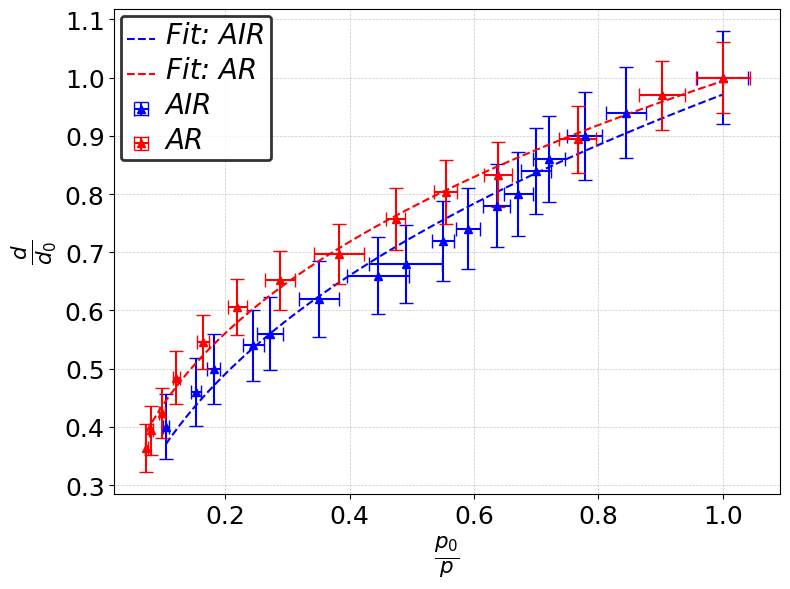

[0.40601948 0.25801158 0.39662885 0.35249589]


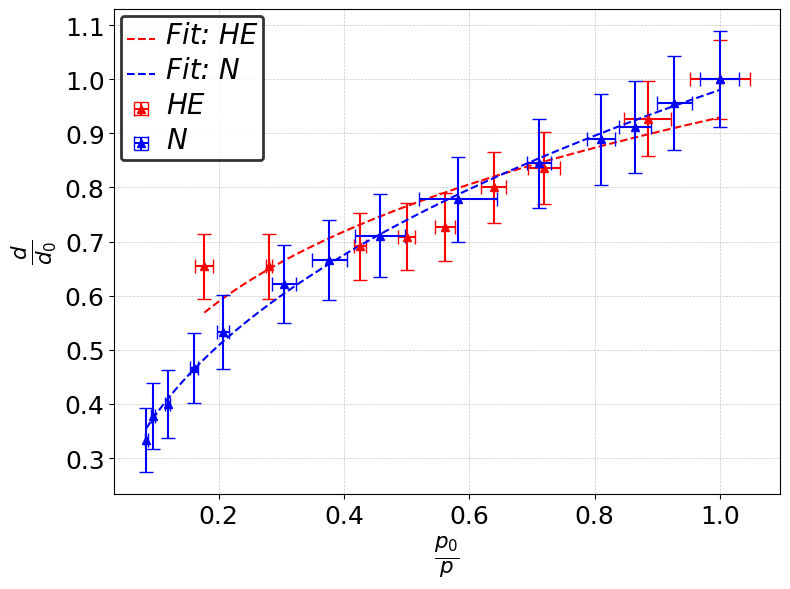

In [14]:
def fit(p, m, c):
    return p**m + c

m = np.zeros(len(Gases))

# Plot 1: AIR et AR
ax1, fig1 = u.create_figure_and_apply_format((8, 6), xlabel=r"$\frac{p_0}{p}$", ylabel=r"$\frac{d}{d_0}$")
for g, color in zip([0, 3], ['blue', 'red']):  # Indices pour AIR et AR avec couleurs bleu et rouge
    p = ps[g]
    d = ds[g]
    p_error = ps_error[g]
    d_error = ds_error[g]
    ax1.errorbar(p, d, xerr=p_error, yerr=d_error, fmt='^', label=Gases[g], capsize=5, color=color)
    
    ax1.grid(axis="both")
    
    popt, pcov = curve_fit(fit, p, d, p0=[1e-1, 40])
    
    p_fit = np.linspace(min(p), max(p), 100)
    d_fit = fit(p_fit, *popt)
    
    ax1.plot(p_fit, d_fit, linestyle='--', label=f'Fit: {Gases[g]}', color=color)

    m[g] = popt[0]

u.set_legend_properties(ax1, loc="upper left")
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.savefig('/workspaces/TP3/TP_Plasma/Figures/stri_air_ar.pdf')
plt.show()

# Plot 2: HE et N
ax2, fig2 = u.create_figure_and_apply_format((8, 6), xlabel=r"$\frac{p_0}{p}$", ylabel=r"$\frac{d}{d_0}$")
for g, color in zip([1, 2], ['red', 'blue']):  # Indices pour HE et N avec couleurs bleu et rouge
    p = ps[g]
    d = ds[g]
    p_error = ps_error[g]
    d_error = ds_error[g]
    ax2.errorbar(p, d, xerr=p_error, yerr=d_error, fmt='^', label=Gases[g], capsize=5, color=color)

    ax2.grid(axis="both")
    
    popt, pcov = curve_fit(fit, p, d, p0=[1e-1, 40])
    
    p_fit = np.linspace(min(p), max(p), 100)
    d_fit = fit(p_fit, *popt)
    
    ax2.plot(p_fit, d_fit, linestyle='--', label=f'Fit: {Gases[g]}', color=color)

    m[g] = popt[0]

u.set_legend_properties(ax2, loc="upper left")
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.savefig('/workspaces/TP3/TP_Plasma/Figures/stri_he_n.pdf')
print(m)
plt.show()
